# **TALENTO TECH**
# **RETO 1**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns


## 1) Cargar Datos

In [3]:
df = pd.read_csv('./dataset_renovables_con_errores.csv')
df

,Planta Energética,Tipo de Energía,Nivel de Democratización Energética,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Región,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
0,SolarFlow,Solar,Alto,42,1.0,100.46,48910.59373127165,Sur,1893.656170,2005,1
1,SunWave,Solar,Bajo,12,17.0,NaN,156615.16814130466,Oeste,3398.187477,2015,0
2,EcoWind,NaN,Bajo,47,NaN,52.62,25618.907447138306,Sur,1642.900952,2010,0
3,SolarFlow,Geotérmica,NaN,24,11.0,NaN,381289.3836417021,Este,2796.374954,2010,1
4,HydroFlux,Hidrógeno verde,Medio,37,5.0,404.25,196815.72283363095,Norte,2144.411388,2020,1
...,...,...,...,...,...,...,...,...,...,...,...
995,EcoWind,Hidrógeno verde,Bajo,20,NaN,522.12,254202.65975484328,Norte,2996.979129,2020,1
996,Solaris,Eólica,Medio,23,7.0,NaN,203987.26419996214,Este,2846.525998,2010,1
997,SunWave,Eólica,Bajo,22,NaN,207.35,100951.73810650186,Norte,2896.677042,2005,0
998,VientoVerde,Eólica,Bajo,20,16.0,418.24,NaN,Este,2996.979129,2015,1


## 2) Explorar datos

In [4]:
df.describe()

,Número de Proyectos en Marcha,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
count,810.000000,1000.000000,1000.000000,1000.00000
mean,10.262963,2620.846302,2012.175000,0.58400
std,5.447467,653.454384,5.605872,0.49314
min,1.000000,1542.598865,2005.000000,0.00000
25%,6.000000,2044.109301,2005.000000,0.00000
50%,10.000000,2620.846302,2010.000000,1.00000
75%,15.000000,3197.583303,2015.000000,1.00000
max,19.000000,3749.244782,2020.000000,1.00000



Filas



In [5]:
df.shape[1]*df.shape[0]

11000

Columnas

In [6]:
df.columns

Index(['Planta Energética', 'Tipo de Energía',
       'Nivel de Democratización Energética',
       'Número de Comunidades Energéticas', 'Número de Proyectos en Marcha',
       'Capacidad Generada (MW)', 'Reducción de CO2 (toneladas)', 'Región',
       'Costo de Producción ($/MW)', 'Año de Instalación',
       'Rentabilidad en 10 años (Rentable=1, No Rentable=0)'],
      dtype='object')

Tipo de datos

In [7]:
df.dtypes

Planta Energética                                       object
Tipo de Energía                                         object
Nivel de Democratización Energética                     object
Número de Comunidades Energéticas                       object
Número de Proyectos en Marcha                          float64
Capacidad Generada (MW)                                 object
Reducción de CO2 (toneladas)                            object
Región                                                  object
Costo de Producción ($/MW)                             float64
Año de Instalación                                       int64
Rentabilidad en 10 años (Rentable=1, No Rentable=0)      int64
dtype: object

* Cualitativo Nominal

In [8]:
df['Planta Energética'].value_counts()

Planta Energética
SunWave        145
VientoVerde    134
Solaris        133
EcoWind        124
SolarFlow      119
WindStream     116
HydroFlux      112
AquaPower      112
error            5
Name: count, dtype: int64

In [9]:
df['Tipo de Energía'].value_counts()

Tipo de Energía
Solar              194
Hidráulica         193
Geotérmica         188
Eólica             188
Hidrógeno verde    159
error                7
Name: count, dtype: int64

In [10]:
df['Región'].value_counts()

Región
Este     246
Sur      238
Oeste    230
Norte    224
Name: count, dtype: int64

* Cuantitatvivo Ordinal

In [11]:
df['Nivel de Democratización Energética'].value_counts()

Nivel de Democratización Energética
Medio    369
Alto     268
Bajo     257
error      6
Name: count, dtype: int64

In [12]:
df['Año de Instalación'].value_counts()

Año de Instalación
2005    277
2015    256
2010    239
2020    228
Name: count, dtype: int64

In [13]:
df['Número de Comunidades Energéticas'].value_counts()

Número de Comunidades Energéticas
49     30
45     30
21     30
41     29
38     28
17     28
15     28
8      27
12     27
32     26
40     26
27     25
36     24
23     24
5      24
48     23
28     23
22     23
25     23
33     23
7      22
39     22
31     22
42     22
44     22
30     22
26     21
43     21
16     20
34     20
47     20
24     20
10     19
14     19
13     18
9      18
29     17
20     17
35     17
19     16
18     16
46     16
37     16
6      16
11     15
@#$     5
Name: count, dtype: int64

* El resto son cuantitaivas

## 3) Generar Estaditicas Descriptivas

In [14]:
data_eliminados = df.dropna(subset=['Planta Energética'])
data_eliminados

,Planta Energética,Tipo de Energía,Nivel de Democratización Energética,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Región,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
0,SolarFlow,Solar,Alto,42,1.0,100.46,48910.59373127165,Sur,1893.656170,2005,1
1,SunWave,Solar,Bajo,12,17.0,NaN,156615.16814130466,Oeste,3398.187477,2015,0
2,EcoWind,NaN,Bajo,47,NaN,52.62,25618.907447138306,Sur,1642.900952,2010,0
3,SolarFlow,Geotérmica,NaN,24,11.0,NaN,381289.3836417021,Este,2796.374954,2010,1
4,HydroFlux,Hidrógeno verde,Medio,37,5.0,404.25,196815.72283363095,Norte,2144.411388,2020,1
...,...,...,...,...,...,...,...,...,...,...,...
995,EcoWind,Hidrógeno verde,Bajo,20,NaN,522.12,254202.65975484328,Norte,2996.979129,2020,1
996,Solaris,Eólica,Medio,23,7.0,NaN,203987.26419996214,Este,2846.525998,2010,1
997,SunWave,Eólica,Bajo,22,NaN,207.35,100951.73810650186,Norte,2896.677042,2005,0
998,VientoVerde,Eólica,Bajo,20,16.0,418.24,NaN,Este,2996.979129,2015,1


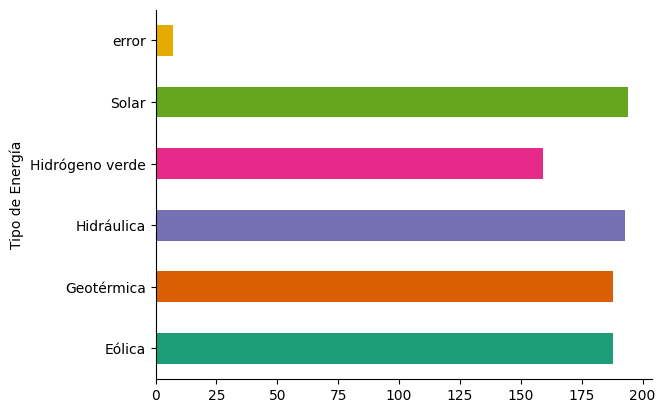

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Tipo de Energía').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
Tipo_dato = ['media', 'mediana', 'desv_estandar', 'varianza', 'v_minimo', 'v_maximo', 'cantidad']

Planta_Energética_Est = [df['Número de Comunidades Energéticas'].mean(),
                         df['Número de Comunidades Energéticas'].median(),
                         df['Número de Comunidades Energéticas'].std(),
                         df['Número de Comunidades Energéticas'].var(),
                         df['Número de Comunidades Energéticas'].min(),
                         df['Número de Comunidades Energéticas'].max(),
                         df['Número de Comunidades Energéticas'].count()
                        ]

Número_Proyectos_Marcha_Est	= [df['Número de Proyectos en Marcha'].mean(),
                                     df['Número de Proyectos en Marcha'].median(),
                                     df['Número de Proyectos en Marcha'].std(),
                                     df['Número de Proyectos en Marcha'].var(),
                                     df['Número de Proyectos en Marcha'].min(),
                                     df['Número de Proyectos en Marcha'].max(),
                                     df['Número de Proyectos en Marcha'].count()
                                    ]

Capacidad_Generada_Est = [df['Capacidad Generada (MW)'].mean(),
                          df['Capacidad Generada (MW)'].median(),
                          df['Capacidad Generada (MW)'].std(),
                          df['Capacidad Generada (MW)'].var(),
                          df['Capacidad Generada (MW)'].min(),
                          df['Capacidad Generada (MW)'].max(),
                          df['Capacidad Generada (MW)'].count()
                         ]

Reducción_de_CO2 = [df['Reducción de CO2 (toneladas)'].mean(),
                    df['Reducción de CO2 (toneladas)'].median(), #Fixed typo here
                    df['Reducción de CO2 (toneladas)'].std(),
                    df['Reducción de CO2 (toneladas)'].var(),
                    df['Reducción de CO2 (toneladas)'].min(),
                    df['Reducción de CO2 (toneladas)'].max(),
                    df['Reducción de CO2 (toneladas)'].count()
                   ]
Costo_de_Producción = [df['Costo de Producción ($/MW)'].mean(),
                        df['Costo de Producción ($/MW)'].median(),
                        df['Costo de Producción ($/MW)'].std(),
                        df['Costo de Producción ($/MW)'].var(),
                        df['Costo de Producción ($/MW)'].min(),
                        df['Costo de Producción ($/MW)'].max(),
                        df['Costo de Producción ($/MW)'].count()
                       ]

Año_de_Instalación = [map(int, df['Año de Instalación'].unique())]




TypeError: Could not convert string '4212472437304325464745132841452128254345431715@#$151749544482316121249163749304332912293127344927242222683437402241233244243716194543633451461517141822134332724103163342720344462145163947549193041253529272842322547224039491342344838367732481945274415364037284338324111841552423331422323947353115429123816425358499342871549830314731461019344641414641392710822133317214936268941451738492627746383649254825481543853228391738154021392244262823414325123292141402331381549162515433292124451610@#$233048483610404215372827193115211831223281149391312492121373612234279173520362633264771446252016645283934343923123044113411754029415194117441291354039644271338188343542153912718174936384923422064421384620426630173538437122718313343435214534172523232926352127361414401224361832281926348172712221635183822381545161935333022362642212728124510948333215547231331384884022191723101641212730333731291427252547174137284815218293413252423231641462141433245392218394845114517224117403562013134215263740492749493813281211402273210484825324454025473917144814174142286262140181439297422116283347294030425243220214432163146344538411011363629371116202047401711401336151237272912492684473345333838321719274830830441393624151936322645@#$3048114630291449231517124483532154754228354530924451537423138193625910@#$26221814173534734103312484947483721151715353248104520839301615412922232742223010848333821474720638121746123436403454743212428263326481341144041323246472528464461231264131337481749144013313853629331172424343939433130182122493324312285530492427141545459521263849453389152539163023491111304492518827462419493312452343323181939415@#$2831444038332828468738272749935451041144411434225247268321642404591727344129311840432026252512203546143638132115361426218292541425294021452864419364310527432138453313171010247211649521730194036368222347394418371838828332310374423593120104417392316204714292435848276264112111872023222012' to numeric

In [17]:
df_est = pd.DataFrame({
  'Tipo_dato': Tipo_dato,
  'Planta_Energética_Est': Planta_Energética_Est,
  'Número_Proyectos_Marcha_Est': Número_Proyectos_Marcha_Est,
  'Capacidad_Generada_Est': Capacidad_Generada_Est,
  'Reducción_de_CO2': Reducción_de_CO2,
  'Costo_de_Producción': Costo_de_Producción,
})
df_est

NameError: name 'Planta_Energética_Est' is not defined

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

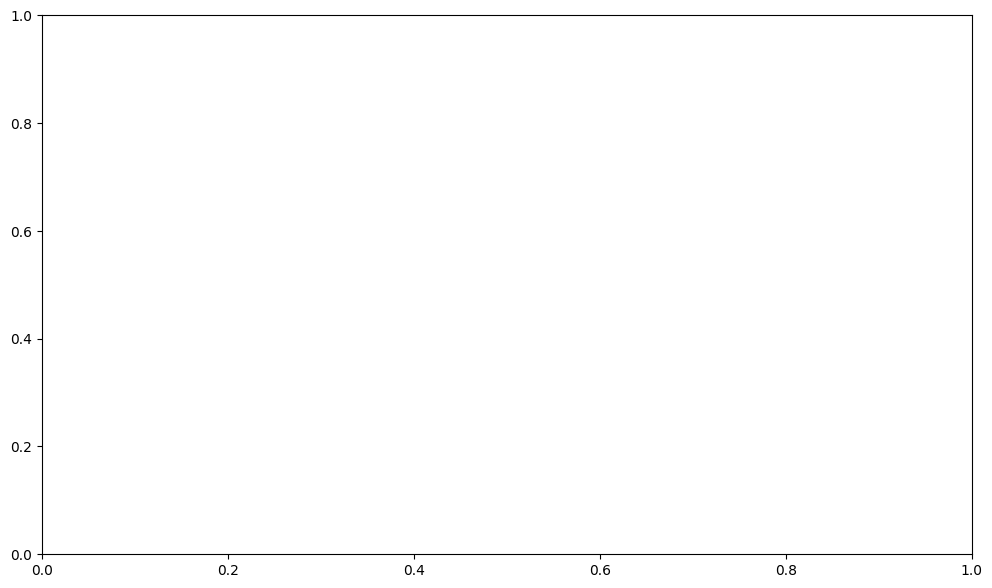

In [18]:
df_bigotes = [df['Número de Comunidades Energéticas'],
              df['Número de Proyectos en Marcha'],
              df['Capacidad Generada (MW)'],
              df['Reducción de CO2 (toneladas)'],
              df['Costo de Producción ($/MW)']
             ]

plt.figure(figsize=(12, 7))
plt.boxplot(df_bigotes)



In [19]:
data_eliminados.isnull().sum()

Planta Energética                                        0
Tipo de Energía                                         71
Nivel de Democratización Energética                    100
Número de Comunidades Energéticas                        0
Número de Proyectos en Marcha                          190
Capacidad Generada (MW)                                168
Reducción de CO2 (toneladas)                            57
Región                                                  62
Costo de Producción ($/MW)                               0
Año de Instalación                                       0
Rentabilidad en 10 años (Rentable=1, No Rentable=0)      0
dtype: int64

In [20]:
df['Número de Comunidades Energéticas'].isnull().sum()

0

(array([119., 145., 124., 112.,   0., 134., 116.,   5., 112., 133.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

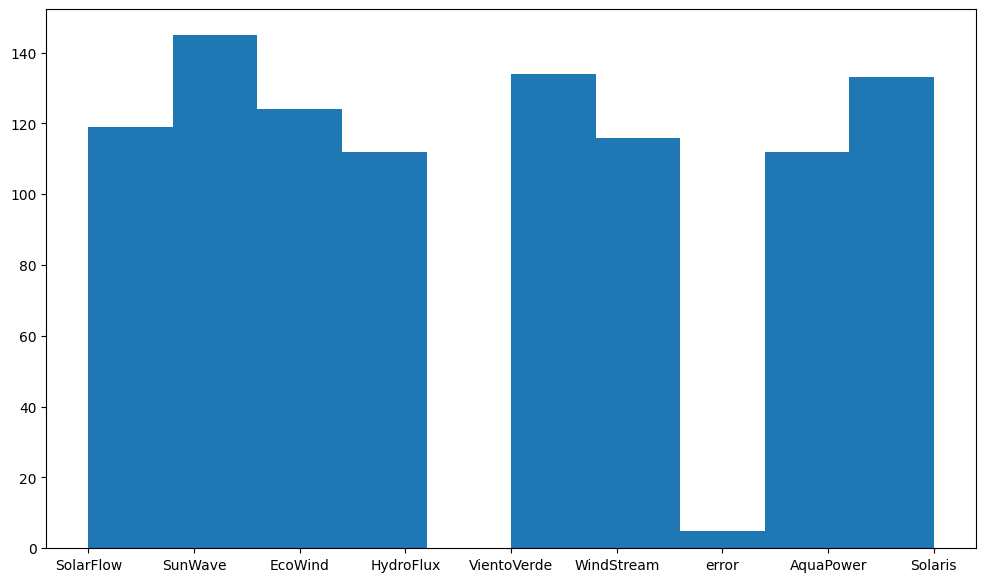

In [21]:
plt.figure(figsize=(12, 7))
plt.hist(df['Planta Energética'])


In [22]:
df['Tipo de Energía'].isnull().sum()

71

<Axes: >

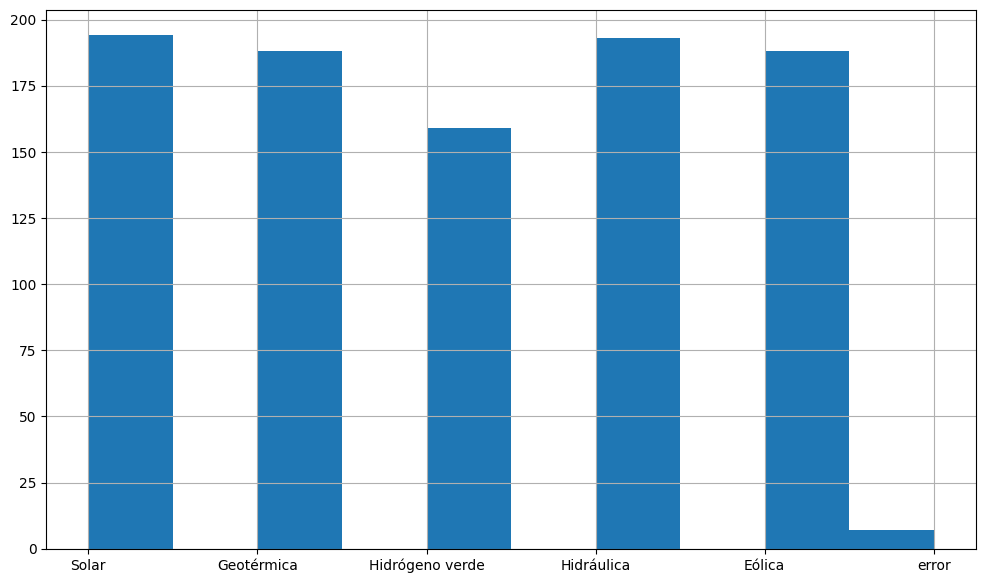

In [23]:
plt.figure(figsize=(12, 7))
(df['Tipo de Energía']).hist()


<Axes: >

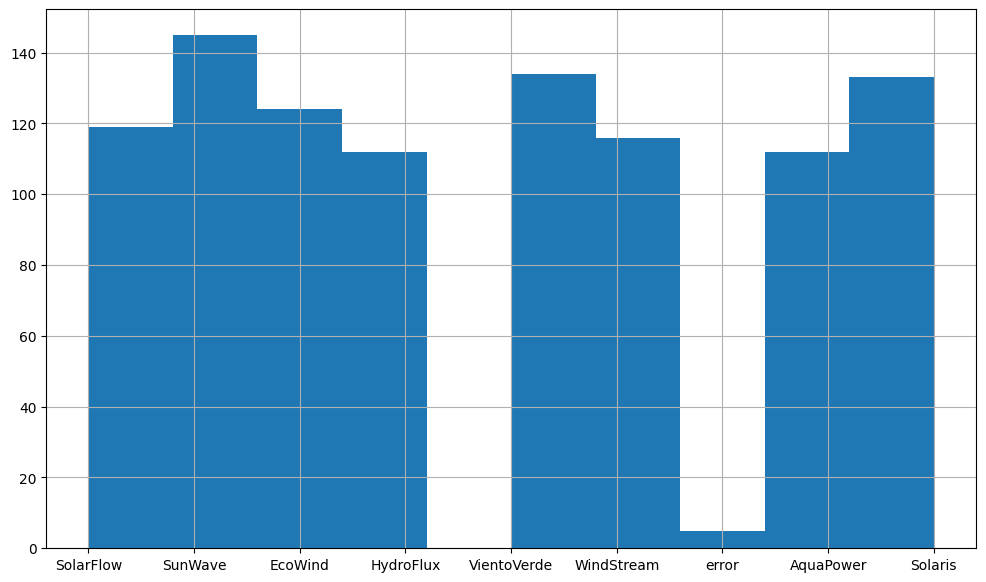

In [24]:
plt.figure(figsize=(12, 7))
(df['Planta Energética']).hist()


<Axes: >

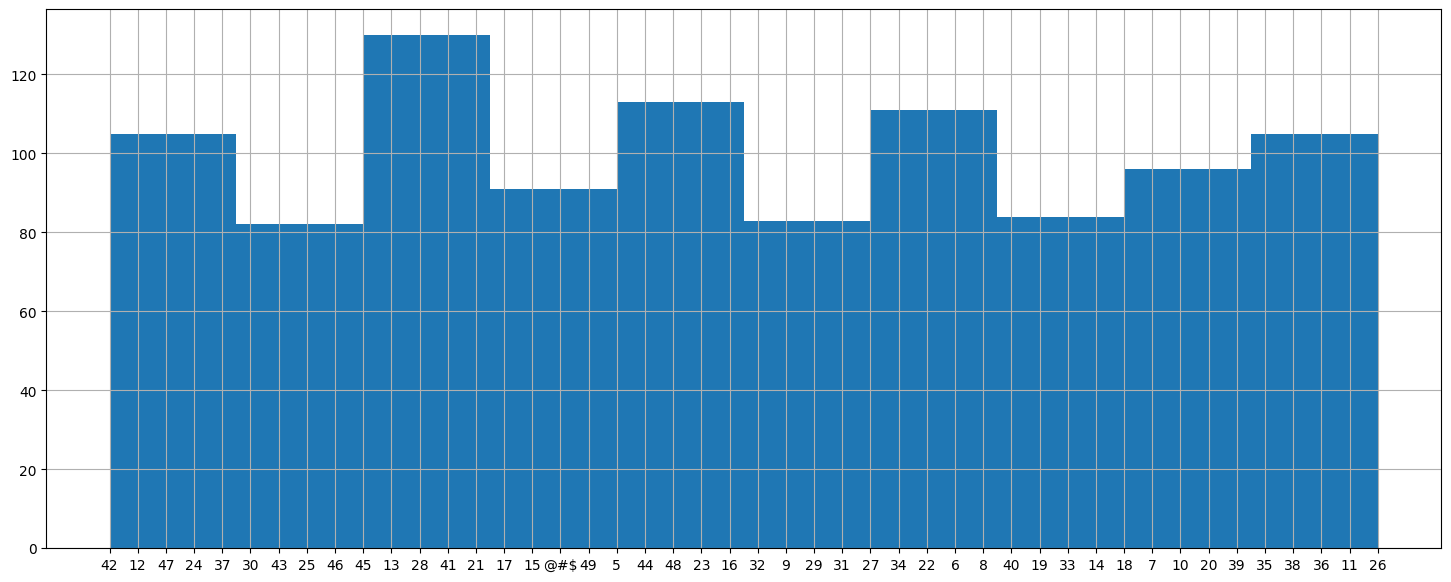

In [25]:
plt.figure(figsize=(18, 7))
(df['Número de Comunidades Energéticas']).hist()

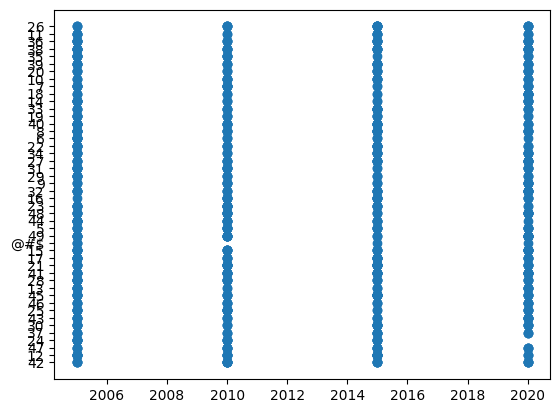

In [26]:
plt.scatter(df['Año de Instalación'], df['Número de Comunidades Energéticas'])

## 4) Dimension de la calidad de datos

In [27]:
df.isnull().sum()

Planta Energética                                        0
Tipo de Energía                                         71
Nivel de Democratización Energética                    100
Número de Comunidades Energéticas                        0
Número de Proyectos en Marcha                          190
Capacidad Generada (MW)                                168
Reducción de CO2 (toneladas)                            57
Región                                                  62
Costo de Producción ($/MW)                               0
Año de Instalación                                       0
Rentabilidad en 10 años (Rentable=1, No Rentable=0)      0
dtype: int64

In [28]:
data_eliminados_te = df.copy()
data_eliminados_te.head()

,Planta Energética,Tipo de Energía,Nivel de Democratización Energética,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Región,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
0,SolarFlow,Solar,Alto,42,1.0,100.46,48910.59373127165,Sur,1893.656170,2005,1
1,SunWave,Solar,Bajo,12,17.0,NaN,156615.16814130466,Oeste,3398.187477,2015,0
2,EcoWind,NaN,Bajo,47,NaN,52.62,25618.907447138306,Sur,1642.900952,2010,0
3,SolarFlow,Geotérmica,NaN,24,11.0,NaN,381289.3836417021,Este,2796.374954,2010,1
4,HydroFlux,Hidrógeno verde,Medio,37,5.0,404.25,196815.72283363095,Norte,2144.411388,2020,1


In [29]:
data_eliminados['Número de Comunidades Energéticas'].isnull().sum()

0

In [30]:
df.isnull().sum()

Planta Energética                                        0
Tipo de Energía                                         71
Nivel de Democratización Energética                    100
Número de Comunidades Energéticas                        0
Número de Proyectos en Marcha                          190
Capacidad Generada (MW)                                168
Reducción de CO2 (toneladas)                            57
Región                                                  62
Costo de Producción ($/MW)                               0
Año de Instalación                                       0
Rentabilidad en 10 años (Rentable=1, No Rentable=0)      0
dtype: int64

## 6)Limpieza de datos

In [31]:
df.describe()

,Número de Proyectos en Marcha,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
count,810.000000,1000.000000,1000.000000,1000.00000
mean,10.262963,2620.846302,2012.175000,0.58400
std,5.447467,653.454384,5.605872,0.49314
min,1.000000,1542.598865,2005.000000,0.00000
25%,6.000000,2044.109301,2005.000000,0.00000
50%,10.000000,2620.846302,2010.000000,1.00000
75%,15.000000,3197.583303,2015.000000,1.00000
max,19.000000,3749.244782,2020.000000,1.00000


In [32]:
var = ['Número de Comunidades Energéticas','Número de Proyectos en Marcha','Capacidad Generada (MW)','Reducción de CO2 (toneladas)','Costo de Producción ($/MW)']
for columna in var:
  df[columna] = df[columna].replace(['null', ' NA', '@#$'], np.nan)

In [33]:
df['Número de Proyectos en Marcha'].value_counts()

Número de Proyectos en Marcha
17.0    58
15.0    55
13.0    54
8.0     52
3.0     47
16.0    47
1.0     42
6.0     41
11.0    41
7.0     40
19.0    40
10.0    40
14.0    39
5.0     38
12.0    36
2.0     36
9.0     36
18.0    34
4.0     34
Name: count, dtype: int64

In [34]:
df[['Capacidad Generada (MW)']].replace('@#$', np.nan, inplace=True)

/tmp/ipykernel_22247/3287413835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Capacidad Generada (MW)']].replace('@#$', np.nan, inplace=True)


In [35]:
df.isnull().sum()

Planta Energética                                        0
Tipo de Energía                                         71
Nivel de Democratización Energética                    100
Número de Comunidades Energéticas                        5
Número de Proyectos en Marcha                          190
Capacidad Generada (MW)                                178
Reducción de CO2 (toneladas)                            61
Región                                                  62
Costo de Producción ($/MW)                               0
Año de Instalación                                       0
Rentabilidad en 10 años (Rentable=1, No Rentable=0)      0
dtype: int64

In [36]:
df['Número de Comunidades Energéticas']

0      42
1      12
2      47
3      24
4      37
       ..
995    20
996    23
997    22
998    20
999    12
Name: Número de Comunidades Energéticas, Length: 1000, dtype: object



---

## 6) Deteccion y tratamiento de los datos ausentes

In [38]:
df.value_counts()

Planta Energética  Tipo de Energía  Nivel de Democratización Energética  Número de Comunidades Energéticas  Número de Proyectos en Marcha  Capacidad Generada (MW)  Reducción de CO2 (toneladas)  Región  Costo de Producción ($/MW)  Año de Instalación  Rentabilidad en 10 años (Rentable=1, No Rentable=0)
AquaPower          Eólica           Alto                                 21                                 16.0                           812.36                   395510.7497863412             Sur     2946.828085                 2005                0                                                      1
SunWave            Eólica           Alto                                 31                                 17.0                           314.07                   152910.11520187624            Este    2445.317649                 2010                0                                                      1
                   Hidráulica       Alto                                 43         

## 7)Cálculo y visualización de matrices de correlación.

<Axes: >

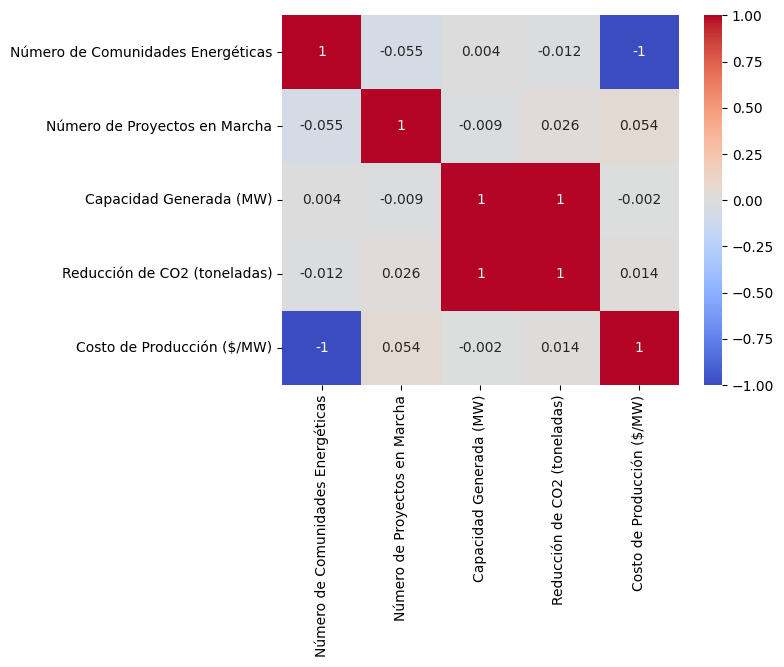

In [39]:
correlacion = df[['Número de Comunidades Energéticas','Número de Proyectos en Marcha','Capacidad Generada (MW)','Reducción de CO2 (toneladas)','Costo de Producción ($/MW)']].corr()

sns.heatmap(correlacion, annot=True, cmap='coolwarm')

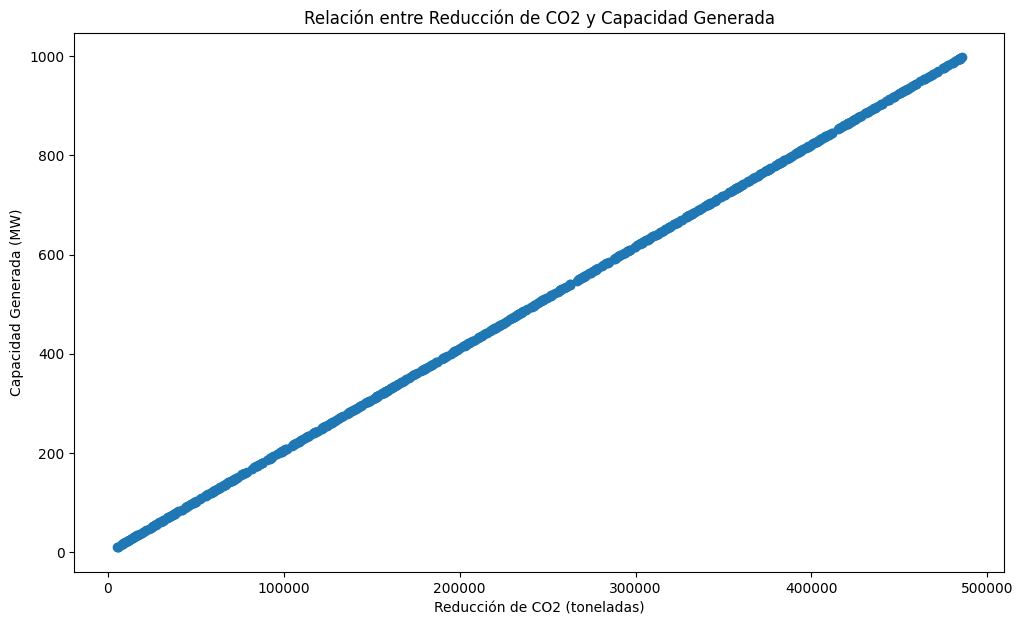

In [40]:
df['Reducción de CO2 (toneladas)'] = pd.to_numeric(df['Reducción de CO2 (toneladas)'])
df['Capacidad Generada (MW)'] = pd.to_numeric(df['Capacidad Generada (MW)'])

plt.figure(figsize=(12, 7))
plt.scatter(df['Reducción de CO2 (toneladas)'], df['Capacidad Generada (MW)'])

plt.xlabel('Reducción de CO2 (toneladas)')
plt.ylabel('Capacidad Generada (MW)')
plt.title('Relación entre Reducción de CO2 y Capacidad Generada')
plt.show()

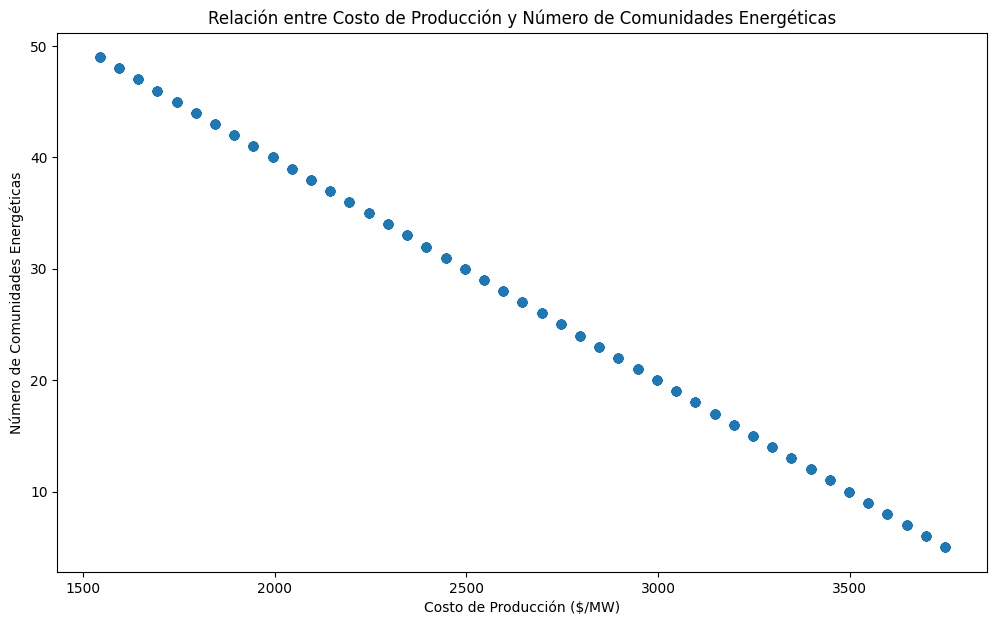

In [41]:
df['Costo de Producción ($/MW)'] = pd.to_numeric(df['Costo de Producción ($/MW)'])
df['Número de Comunidades Energéticas'] = pd.to_numeric(df['Número de Comunidades Energéticas'])

plt.figure(figsize=(12, 7))
plt.scatter(df['Costo de Producción ($/MW)'], df['Número de Comunidades Energéticas'])

plt.xlabel('Costo de Producción ($/MW)')
plt.ylabel('Número de Comunidades Energéticas')
plt.title('Relación entre Costo de Producción y Número de Comunidades Energéticas')
plt.show()

## 8)Normalización de Datos: Aplicar técnicas de Min-Max Scaling y escalado robusto para normalizar los datos y mejorar el rendimiento del modelo.

In [42]:
df.isnull().sum()

Planta Energética                                        0
Tipo de Energía                                         71
Nivel de Democratización Energética                    100
Número de Comunidades Energéticas                        5
Número de Proyectos en Marcha                          190
Capacidad Generada (MW)                                178
Reducción de CO2 (toneladas)                            61
Región                                                  62
Costo de Producción ($/MW)                               0
Año de Instalación                                       0
Rentabilidad en 10 años (Rentable=1, No Rentable=0)      0
dtype: int64

In [43]:
df['Número de Proyectos en Marcha'].fillna(df['Número de Proyectos en Marcha'].mean(), inplace=True)

/tmp/ipykernel_22247/4192706863.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Número de Proyectos en Marcha'].fillna(df['Número de Proyectos en Marcha'].mean(), inplace=True)


In [44]:
df.isnull().sum()

Planta Energética                                        0
Tipo de Energía                                         71
Nivel de Democratización Energética                    100
Número de Comunidades Energéticas                        5
Número de Proyectos en Marcha                            0
Capacidad Generada (MW)                                178
Reducción de CO2 (toneladas)                            61
Región                                                  62
Costo de Producción ($/MW)                               0
Año de Instalación                                       0
Rentabilidad en 10 años (Rentable=1, No Rentable=0)      0
dtype: int64

In [46]:
df.dtypes


Planta Energética                                       object
Tipo de Energía                                         object
Nivel de Democratización Energética                     object
Número de Comunidades Energéticas                      float64
Número de Proyectos en Marcha                          float64
Capacidad Generada (MW)                                float64
Reducción de CO2 (toneladas)                           float64
Región                                                  object
Costo de Producción ($/MW)                             float64
Año de Instalación                                       int64
Rentabilidad en 10 años (Rentable=1, No Rentable=0)      int64
dtype: object

In [47]:
df['Capacidad Generada (MW)'] = pd.to_numeric(df['Capacidad Generada (MW)'])
print(df['Capacidad Generada (MW)'].dtype)

float64


In [48]:
df['Capacidad Generada (MW)'].fillna(df['Capacidad Generada (MW)'].mean(), inplace=True)

/tmp/ipykernel_22247/1755874873.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Capacidad Generada (MW)'].fillna(df['Capacidad Generada (MW)'].mean(), inplace=True)


In [49]:
df.isnull().sum()

Planta Energética                                        0
Tipo de Energía                                         71
Nivel de Democratización Energética                    100
Número de Comunidades Energéticas                        5
Número de Proyectos en Marcha                            0
Capacidad Generada (MW)                                  0
Reducción de CO2 (toneladas)                            61
Región                                                  62
Costo de Producción ($/MW)                               0
Año de Instalación                                       0
Rentabilidad en 10 años (Rentable=1, No Rentable=0)      0
dtype: int64

In [50]:
df['Reducción de CO2 (toneladas)'] = pd.to_numeric(df['Reducción de CO2 (toneladas)'])
print(df['Reducción de CO2 (toneladas)'].dtype)

float64


In [51]:
df['Reducción de CO2 (toneladas)'].fillna(df['Reducción de CO2 (toneladas)'].mean(), inplace=True)

/tmp/ipykernel_22247/3633543789.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Reducción de CO2 (toneladas)'].fillna(df['Reducción de CO2 (toneladas)'].mean(), inplace=True)


In [52]:
df.isnull().sum()

Planta Energética                                        0
Tipo de Energía                                         71
Nivel de Democratización Energética                    100
Número de Comunidades Energéticas                        5
Número de Proyectos en Marcha                            0
Capacidad Generada (MW)                                  0
Reducción de CO2 (toneladas)                             0
Región                                                  62
Costo de Producción ($/MW)                               0
Año de Instalación                                       0
Rentabilidad en 10 años (Rentable=1, No Rentable=0)      0
dtype: int64

In [53]:
df['Número de Comunidades Energéticas'] = pd.to_numeric(df['Número de Comunidades Energéticas'])
print(df['Número de Comunidades Energéticas'].dtype)

float64


In [54]:
df['Número de Comunidades Energéticas'].fillna(df['Número de Comunidades Energéticas'].mean(), inplace=True)

/tmp/ipykernel_22247/1991743060.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Número de Comunidades Energéticas'].fillna(df['Número de Comunidades Energéticas'].mean(), inplace=True)


In [55]:
df.isnull().sum()

Planta Energética                                        0
Tipo de Energía                                         71
Nivel de Democratización Energética                    100
Número de Comunidades Energéticas                        0
Número de Proyectos en Marcha                            0
Capacidad Generada (MW)                                  0
Reducción de CO2 (toneladas)                             0
Región                                                  62
Costo de Producción ($/MW)                               0
Año de Instalación                                       0
Rentabilidad en 10 años (Rentable=1, No Rentable=0)      0
dtype: int64

In [56]:
tde = df['Nivel de Democratización Energética']
tde

0       Alto
1       Bajo
2       Bajo
3        NaN
4      Medio
       ...  
995     Bajo
996    Medio
997     Bajo
998     Bajo
999    Medio
Name: Nivel de Democratización Energética, Length: 1000, dtype: object

In [57]:
tipo_de_energia_num = pd.get_dummies(df['Tipo de Energía'], columns=['Tipo de Energía'], dtype=float)
tipo_de_energia_num

,Eólica,Geotérmica,Hidráulica,Hidrógeno verde,Solar,error
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0
996,1.0,0.0,0.0,0.0,0.0,0.0
997,1.0,0.0,0.0,0.0,0.0,0.0
998,1.0,0.0,0.0,0.0,0.0,0.0


In [58]:
nivel_de_demo_energetica_num = pd.get_dummies(df['Nivel de Democratización Energética'], columns=['Nivel de Democratización Energética'], dtype=float)
nivel_de_demo_energetica_num

,Alto,Bajo,Medio,error
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
995,0.0,1.0,0.0,0.0
996,0.0,0.0,1.0,0.0
997,0.0,1.0,0.0,0.0
998,0.0,1.0,0.0,0.0


In [59]:
region_num = pd.get_dummies(df['Región'], columns=['Región'], dtype=float)
region_num

,Este,Norte,Oeste,Sur
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
995,0.0,1.0,0.0,0.0
996,1.0,0.0,0.0,0.0
997,0.0,1.0,0.0,0.0
998,1.0,0.0,0.0,0.0


In [60]:
nominaul_num = pd.concat([tipo_de_energia_num, nivel_de_demo_energetica_num, region_num], axis=1)
nominaul_num

,Eólica,Geotérmica,Hidráulica,Hidrógeno verde,Solar,error,Alto,Bajo,Medio,error,Este,Norte,Oeste,Sur
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [61]:
df_num = pd.concat([df[['Número de Comunidades Energéticas','Número de Proyectos en Marcha','Capacidad Generada (MW)','Reducción de CO2 (toneladas)','Costo de Producción ($/MW)', 'Rentabilidad en 10 años (Rentable=1, No Rentable=0)']], nominaul_num], axis=1)
df_num

,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Costo de Producción ($/MW),"Rentabilidad en 10 años (Rentable=1, No Rentable=0)",Eólica,Geotérmica,Hidráulica,Hidrógeno verde,Solar,error,Alto,Bajo,Medio,error,Este,Norte,Oeste,Sur
0,42.0,1.000000,100.460000,48910.593731,1893.656170,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,12.0,17.000000,494.468248,156615.168141,3398.187477,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,47.0,10.262963,52.620000,25618.907447,1642.900952,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,24.0,11.000000,494.468248,381289.383642,2796.374954,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,37.0,5.000000,404.250000,196815.722834,2144.411388,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20.0,10.262963,522.120000,254202.659755,2996.979129,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
996,23.0,7.000000,494.468248,203987.264200,2846.525998,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
997,22.0,10.262963,207.350000,100951.738107,2896.677042,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,20.0,16.000000,418.240000,240099.515545,2996.979129,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [62]:
df_num.dtypes

Número de Comunidades Energéticas                      float64
Número de Proyectos en Marcha                          float64
Capacidad Generada (MW)                                float64
Reducción de CO2 (toneladas)                           float64
Costo de Producción ($/MW)                             float64
Rentabilidad en 10 años (Rentable=1, No Rentable=0)      int64
Eólica                                                 float64
Geotérmica                                             float64
Hidráulica                                             float64
Hidrógeno verde                                        float64
Solar                                                  float64
error                                                  float64
Alto                                                   float64
Bajo                                                   float64
Medio                                                  float64
error                                                  

In [63]:
df_num.isnull().sum()

Número de Comunidades Energéticas                      0
Número de Proyectos en Marcha                          0
Capacidad Generada (MW)                                0
Reducción de CO2 (toneladas)                           0
Costo de Producción ($/MW)                             0
Rentabilidad en 10 años (Rentable=1, No Rentable=0)    0
Eólica                                                 0
Geotérmica                                             0
Hidráulica                                             0
Hidrógeno verde                                        0
Solar                                                  0
error                                                  0
Alto                                                   0
Bajo                                                   0
Medio                                                  0
error                                                  0
Este                                                   0
Norte                          